In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_excel("C:/Users/USER/Downloads/archive (1)/Superstore_USA.xlsx")

In [5]:
dataset.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


In [8]:
dataset.shape

(9426, 24)

# Missing value analysis

In [14]:
dataset.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

# Filling missing value by mean

In [13]:
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(),inplace=True)

# checkig order priority data

In [15]:
dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [19]:
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

# Replacing(data cleaning) the duplicates

In [18]:
dataset['Order Priority'] = dataset['Order Priority'].replace("Critical ","Critical")

# BAR Graph(Count of order priority)

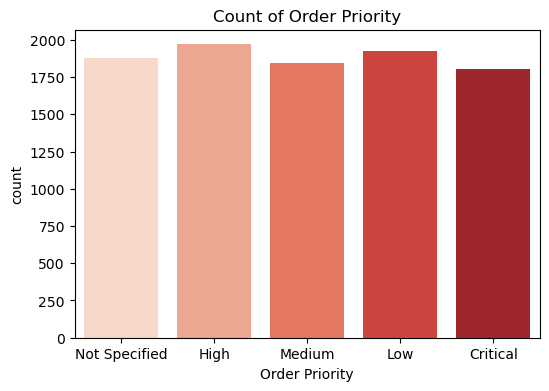

In [46]:
plt.figure(figsize=(6,4))
sns.countplot(x = "Order Priority",data = dataset,palette ="Reds")
plt.title("Count of Order Priority")
plt.savefig("Count of Order Priority.jpg")
plt.show()


# Line Graph(Sales against customer segment)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


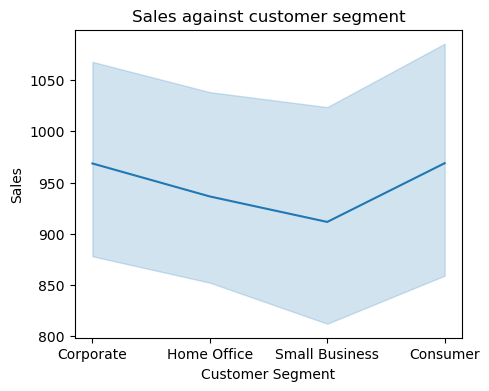

In [44]:
plt.figure(figsize = (5,4))
sns.lineplot(x = "Customer Segment",y = "Sales",data = dataset)
plt.title("Sales against customer segment")
plt.show()

# Pie Chart(Ship Mode)

In [13]:
dataset['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [19]:
#we have to separate inex and values

x = dataset['Ship Mode'].value_counts().index
y = dataset['Ship Mode'].value_counts().values

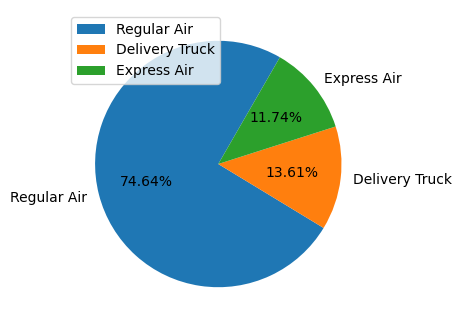

In [34]:
plt.figure(figsize=(5,4))
plt.pie(y,labels = x,startangle = 60,autopct = "%0.2f%%")
plt.legend(loc = 2)
plt.show()

# Product Category against ship mode

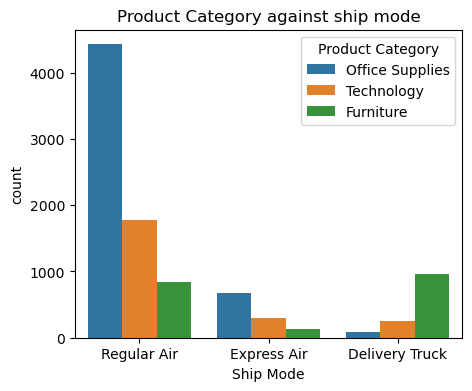

In [38]:
plt.figure(figsize = (5,4,))
sns.countplot(x = "Ship Mode",data = dataset,hue = "Product Category")
plt.title("Product Category against ship mode")
plt.show()

# Product Catagory

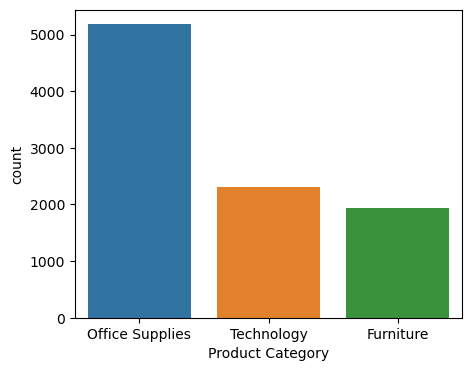

In [40]:
plt.figure(figsize = (5,4))
sns.countplot(x = "Product Category",data = dataset)
plt.show()

# Profit against product catagory

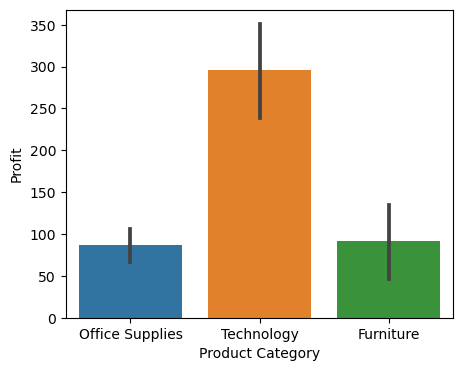

In [46]:
plt.figure(figsize = (5,4))
sns.barplot(x = "Product Category",y = "Profit",data = dataset)
plt.show()

# Need to find top 5 states of sales

In [51]:
dataset['State or Province'].value_counts() [:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

# Yearwise sales count

In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [55]:
dataset['Order Year'] = dataset['Order Date'].dt.year

In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

# No of Sales per year

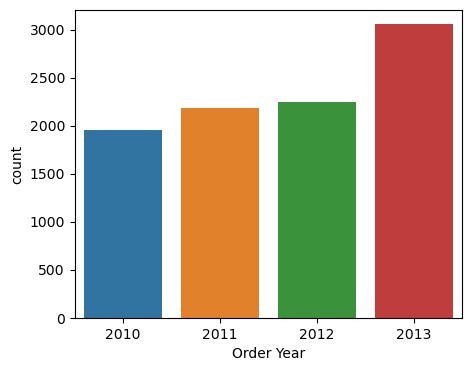

In [58]:
plt.figure(figsize=(5,4))
sns.countplot(x = "Order Year",data = dataset)
plt.show()